In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn


In [2]:
train = pd.read_csv('train.csv', low_memory=False)

test  = pd.read_csv('test.csv', low_memory=False)

In [3]:
homedata = train

## Importing the Data

In [4]:
train = train.set_index('Id')

In [5]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
test = test.set_index('Id')

In [7]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [95]:
train.shape

(1460, 80)

In [96]:
test.shape

(1459, 91)

In [8]:
homedata.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [9]:
homedata.shape

(1460, 81)

In [10]:
len(homedata)

1460

#### Removing missing data

In [11]:
homedata[["LotFrontage"]].fillna(np.median)
homedata.replace(np.nan, 0, inplace=True)

In [12]:
homedata.isna().values.any()

False

In [13]:
train[["LotFrontage"]].fillna(np.median)
train.replace(np.nan, 0, inplace=True)
test[["LotFrontage"]].fillna(np.median)
test.replace(np.nan, 0, inplace=True)

## Mapping categorical data to numbers  

#### After realizing that much of the data was categorical, we decided to map many of the columns to numbers to gain a better understanding of their relationships.

In [14]:
def stylemapping (style):
    if style == '1Story':
        return '1'
    elif style == '1.5Fin':
        return '1.5'
    elif style == '1.5Unf':
        return '1.5'
    elif style == '2Story':
        return '2'
    elif style == '2.5Fin':
        return '2.5'
    elif style == '2.5Unf':
        return '2.5'
    elif style == 'SFoyer':
        return '1.5'
    elif style == 'SLvl':
        return '1.5'
    else: 
        return '0'
    
stylemapping('2.5Unf')

'2.5'

In [15]:
homedata['HouseStyle']= homedata['HouseStyle'].map(stylemapping)

In [16]:
homedata['HouseStyle']

0       2
1       1
2       2
3       2
4       2
       ..
1455    2
1456    1
1457    2
1458    1
1459    1
Name: HouseStyle, Length: 1460, dtype: object

In [17]:
def qualmapping (qual):
    if qual == 'Ex':
        return '5'
    elif qual == 'Gd':
        return '4'
    elif qual == 'TA':
        return '3'
    elif qual == 'Fa':
        return '2'
    elif qual == 'Po':
        return '1'
    else:
        return '0'
    
qualmapping('Ex')

'5'

In [18]:
homedata['ExterQual']= homedata['ExterQual'].map(qualmapping)
homedata['ExterCond']= homedata['ExterCond'].map(qualmapping)
homedata['BsmtQual']= homedata['BsmtQual'].map(qualmapping)
homedata['ExterQual']= homedata['ExterQual'].map(qualmapping)
homedata['BsmtCond']= homedata['BsmtCond'].map(qualmapping)
homedata['HeatingQC']= homedata['HeatingQC'].map(qualmapping)
homedata['KitchenQual']= homedata['KitchenQual'].map(qualmapping)
homedata['FireplaceQu']= homedata['FireplaceQu'].map(qualmapping)
homedata['GarageQual']= homedata['GarageQual'].map(qualmapping)
homedata['GarageCond']= homedata['GarageCond'].map(qualmapping)
homedata['PoolQC']= homedata['PoolQC'].map(qualmapping)

In [19]:
homedata['HeatingQC']

0       5
1       5
2       5
3       4
4       5
       ..
1455    5
1456    3
1457    5
1458    4
1459    4
Name: HeatingQC, Length: 1460, dtype: object

In [20]:
homedata['ExterQual']

0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    0
1458    0
1459    0
Name: ExterQual, Length: 1460, dtype: object

In [21]:
#zoning 

def zoningmapping (zone):
    if zone == 'A':
        return '1'
    elif zone == 'C':
        return '2'
    elif zone == 'FV':
        return '3'
    elif zone == 'I':
        return '4'
    elif zone == 'RH':
        return '5'
    elif zone == 'RL':
        return '6'
    elif zone == 'RP':
        return '7'
    elif zone == 'RM':
        return '8'
    else:
        return '0'
    
zoningmapping('A') 

'1'

In [22]:
homedata['MSZoning']= homedata['MSZoning'].map(zoningmapping)

In [23]:
homedata['MSZoning']== '5'

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Name: MSZoning, Length: 1460, dtype: bool

In [24]:
#functionlity

def functmapping (funct):
    if funct == 'Typ':
        return '1'
    elif funct == 'Min1':
        return '2'
    elif funct == 'Min2':
        return '3'
    elif funct == 'Mod':
        return '4'
    elif funct == 'Maj1':
        return '5'
    elif funct == 'Maj2':
        return '6'
    elif funct == 'Sev':
        return '7'
    elif funct == 'Sal':
        return '8'
    else:
        return '0'
    
functmapping('Typ') 

'1'

In [25]:
homedata['Functional']= homedata['Functional'].map(functmapping)

In [26]:
homedata['Functional']

0       1
1       1
2       1
3       1
4       1
       ..
1455    1
1456    2
1457    1
1458    1
1459    1
Name: Functional, Length: 1460, dtype: object

In [27]:
#Condition of Sale

def scmapping (cond):
    if cond == 'Normal':
        return '1'
    elif cond == 'Abnorml':
        return '2'
    elif cond == 'AdjLand':
        return '3'
    elif cond == 'Alloca':
        return '4'
    elif cond == 'Family':
        return '5'
    elif cond == 'Partial':
        return '6'
    else:
        return '0'

In [28]:
homedata['SaleCondition']= homedata['SaleCondition'].map(scmapping)

In [29]:
homedata['SaleCondition']

0       1
1       1
2       1
3       2
4       1
       ..
1455    1
1456    1
1457    1
1458    1
1459    1
Name: SaleCondition, Length: 1460, dtype: object

In [30]:
homedata['ExterQual']= homedata.ExterQual.astype('int64')
homedata['ExterCond']= homedata.ExterCond.astype('int64')
homedata['BsmtQual']= homedata.BsmtQual.astype('int64')
homedata['ExterQual']= homedata.ExterQual.astype('int64')
homedata['BsmtCond']= homedata.BsmtCond.astype('int64')
homedata['HeatingQC']= homedata.HeatingQC.astype('int64')
homedata['KitchenQual']= homedata.KitchenQual.astype('int64')
homedata['FireplaceQu']= homedata.FireplaceQu.astype('int64')
homedata['GarageQual']= homedata.GarageQual.astype('int64')
homedata['GarageCond']= homedata.GarageCond.astype('int64')
homedata['PoolQC']= homedata.PoolQC.astype('int64')
homedata['MSZoning']= homedata.MSZoning.astype('int64')
homedata['Functional']= homedata.Functional.astype('int64')
homedata['SaleCondition']= homedata.SaleCondition.astype('int64')
homedata['LotFrontage']= homedata.LotFrontage.astype('int64')
homedata['GarageYrBlt']= homedata.GarageYrBlt.astype('int64')
homedata['MasVnrArea']= homedata.MasVnrArea.astype('int64')
  

In [31]:
homedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   int64 
 3   LotFrontage    1460 non-null   int64 
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

#### The data provided has been merged to have the testing and training data provided. 

## Exploring the Data

In [32]:
homedata.describe()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,6.113014,57.623288,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,...,21.954110,3.409589,15.060959,2.758904,0.017808,43.489041,6.321918,2007.815753,1.582192,180921.195890
std,421.610009,42.300571,1.115150,34.664304,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,...,61.119149,29.317331,55.757415,40.177307,0.268952,496.123024,2.703626,1.328095,1.475209,79442.502883
min,1.000000,20.000000,0.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,1.000000,34900.000000
25%,365.750000,20.000000,6.000000,42.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,1.000000,129975.000000
50%,730.500000,50.000000,6.000000,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,1.000000,163000.000000
75%,1095.250000,70.000000,6.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,1.000000,214000.000000
max,1460.000000,190.000000,8.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,552.000000,508.000000,480.000000,738.000000,5.000000,15500.000000,12.000000,2010.000000,6.000000,755000.000000


In [33]:
import matplotlib.pyplot as plt



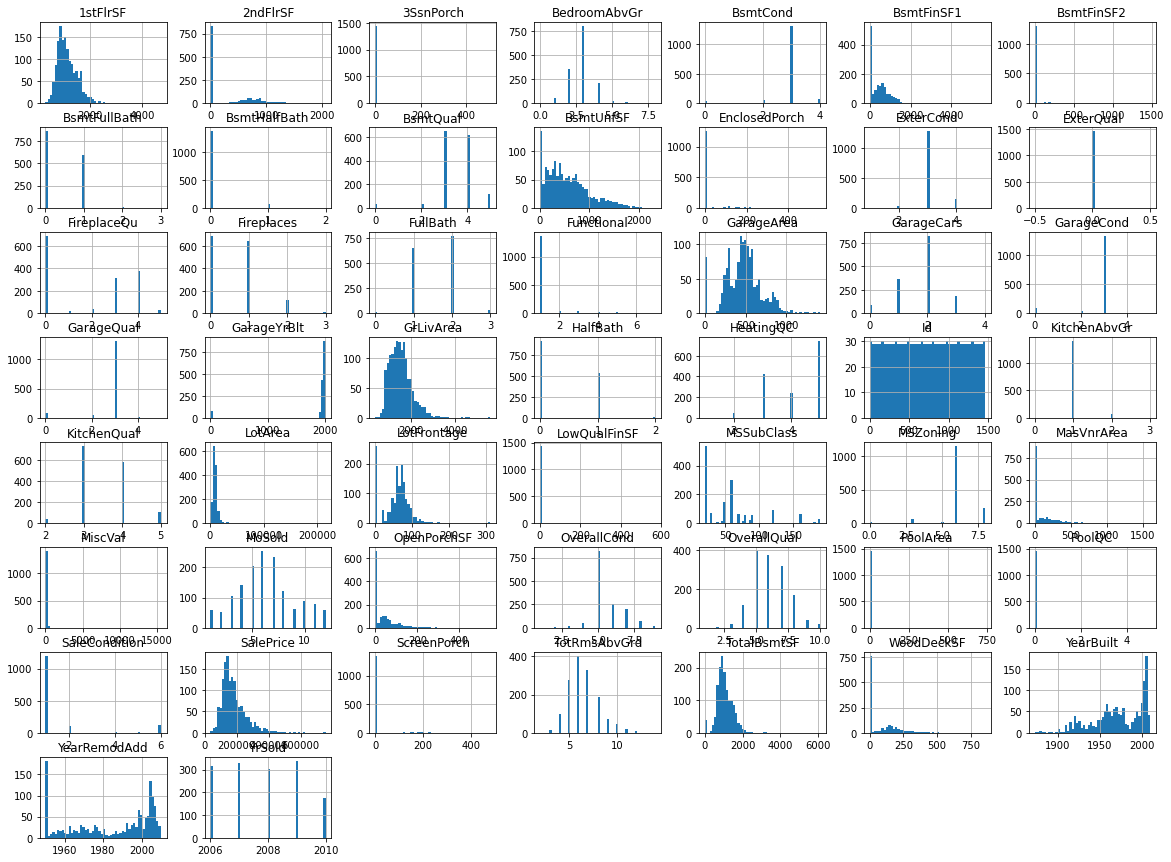

In [34]:
homedata.hist(bins=50, figsize=(20,15))

plt.show()

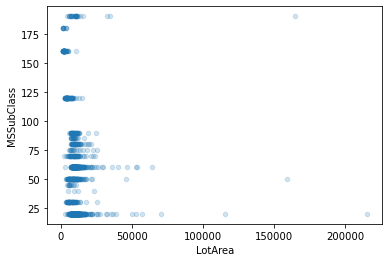

In [35]:
homedata.plot(kind="scatter", x="LotArea", y="MSSubClass", alpha=0.2)

In [36]:
correlation = homedata.corr()

In [37]:
correlation

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
Id,1.000000,0.011156,-0.006103,-0.019761,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.051071,...,0.002889,-0.046635,0.001330,0.057044,0.047655,-0.006242,0.021172,0.000712,-0.021060,-0.021917
MSSubClass,0.011156,1.000000,0.077836,-0.215023,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,...,-0.012037,-0.043825,-0.026030,0.008283,0.014198,-0.007683,-0.013585,-0.021407,-0.040614,-0.084284
MSZoning,-0.006103,0.077836,1.000000,-0.067144,-0.057664,-0.155718,0.192247,-0.314512,-0.165580,-0.066789,...,0.122490,-0.005379,0.010372,-0.006964,-0.006715,0.006170,-0.032081,-0.024805,-0.148765,-0.178620
LotFrontage,-0.019761,-0.215023,-0.067144,1.000000,0.100739,0.176561,-0.053457,0.036853,0.078686,0.105010,...,0.027366,0.023499,0.022969,0.114106,0.150254,-0.059606,0.018942,-0.012094,0.180021,0.209624
LotArea,-0.033226,-0.139781,-0.057664,0.100739,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,...,-0.018340,0.020423,0.043160,0.077672,0.091727,0.038068,0.001205,-0.014261,0.013773,0.263843
OverallQual,-0.028365,0.032628,-0.155718,0.176561,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,...,-0.113937,0.030371,0.064886,0.065166,0.083690,-0.031406,0.070815,-0.027347,0.269625,0.790982
OverallCond,0.012609,-0.059316,0.192247,-0.053457,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,...,0.070356,0.025504,0.054811,-0.001985,-0.013646,0.068777,-0.003511,0.043950,-0.168277,-0.077856
YearBuilt,-0.012713,0.027850,-0.314512,0.036853,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,...,-0.387268,0.031355,-0.050364,0.004950,0.002113,-0.034383,0.012398,-0.013618,0.290899,0.522897
YearRemodAdd,-0.021998,0.040581,-0.165580,0.078686,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,...,-0.193919,0.045286,-0.038740,0.005829,0.010059,-0.010286,0.021490,0.035743,0.261054,0.507101
MasVnrArea,-0.051071,0.023573,-0.066789,0.105010,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,...,-0.109907,0.019144,0.062248,0.011928,0.015073,-0.029512,-0.006723,-0.008317,0.139962,0.472614


In [38]:
correlation["SalePrice"].sort_values(ascending=False)


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
KitchenQual      0.659600
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
BsmtQual         0.585207
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
FireplaceQu      0.520438
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
HeatingQC        0.427649
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
SaleCondition    0.292568
HalfBath         0.284108
GarageQual       0.273839
LotArea          0.263843
GarageCond       0.263191
GarageYrBlt      0.261366
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BsmtCond         0.212607
LotFrontage      0.209624
BedroomAbvGr     0.168213
PoolQC           0.111696
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
ExterCond        0.018899
BsmtFinSF2  

#### Using correlation, we can focus on features that are more highly correlated to the Sales Price. 

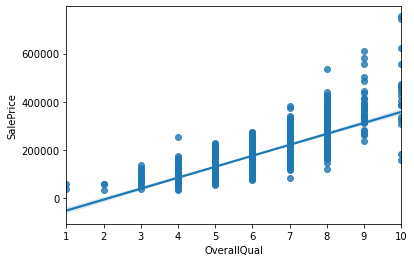

In [39]:
import seaborn as sns

ax = sns.regplot(x="OverallQual", y="SalePrice", data= homedata)

#### Quality is linearly related to Sale Prices

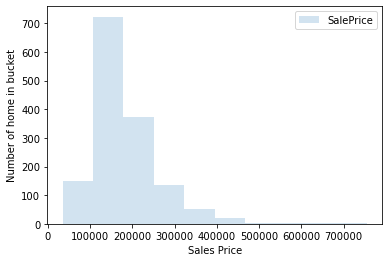

In [40]:
homedata.plot(kind="hist",y= "SalePrice", alpha=0.2, )
plt.xlabel('Sales Price' )
plt.ylabel('Number of home in bucket')
plt.show()

#### More than half of the dataset falls within the 120k - 225k price range. This will be an item we keep in mind when reviewing our model results.

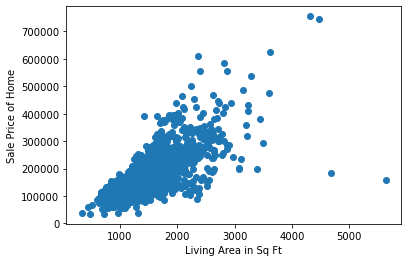

In [41]:
plt.scatter(homedata['GrLivArea'], homedata['SalePrice'])

plt.ylabel('Sale Price of Home')
plt.xlabel('Living Area in Sq Ft')
plt.show()

#### With the exception of a few homes, living area in the home is highly correlated to the Sales Price of the home.

## Feature Engineering

#### Based on the correlation data found, we created features that we thought would help predict the Sales Price of the homes.

In [42]:
#feature1

homedata['WasRemodeled'] = homedata["YearRemodAdd"] != homedata["YearBuilt"]
homedata.WasRemodeled.astype('int64')

0       0
1       0
2       1
3       1
4       0
       ..
1455    1
1456    1
1457    1
1458    1
1459    0
Name: WasRemodeled, Length: 1460, dtype: int64

In [43]:
homedata['WasRemodeled']=homedata.WasRemodeled.astype('int64')

In [44]:
homedata['WasRemodeled']

0       0
1       0
2       1
3       1
4       0
       ..
1455    1
1456    1
1457    1
1458    1
1459    0
Name: WasRemodeled, Length: 1460, dtype: int64

In [45]:
#feature2

homedata['AgeatSale']= train["YrSold"] - train["YearBuilt"]


In [46]:
homedata['AgeatSale']

0        NaN
1        5.0
2       31.0
3        7.0
4       91.0
        ... 
1455     5.0
1456     8.0
1457    32.0
1458    69.0
1459    60.0
Name: AgeatSale, Length: 1460, dtype: float64

In [47]:
#feature3
homedata["TotalSF"] = homedata["TotalBsmtSF"] + homedata["1stFlrSF"] + homedata["2ndFlrSF"]
homedata["TotalRoom"] = homedata["BsmtFullBath"] + homedata["BsmtHalfBath"] + homedata["FullBath"] + homedata["HalfBath"] + homedata["TotRmsAbvGrd"]
homedata['AvgSpacePerRoom'] = homedata["TotalSF"] / homedata["TotalRoom"]



In [48]:

homedata['AvgSpacePerRoom']

0       213.833333
1       280.444444
2       270.600000
3       274.777778
4       257.153846
           ...    
1455    260.000000
1456    361.500000
1457    317.454545
1458    308.000000
1459    279.111111
Name: AvgSpacePerRoom, Length: 1460, dtype: float64

In [49]:
#feature4

homedata['HousetoLotProp'] = homedata["TotalSF"] / homedata["LotArea"]

homedata['HousetoLotProp']

0       0.303669
1       0.262917
2       0.240533
3       0.258953
4       0.234432
          ...   
1455    0.328407
1456    0.274383
1457    0.386198
1458    0.221879
1459    0.252793
Name: HousetoLotProp, Length: 1460, dtype: float64

In [50]:
#feature5

homedata['TotalBackyardAreaUtilized'] = homedata['WoodDeckSF']+homedata['OpenPorchSF']+homedata['EnclosedPorch']+homedata['3SsnPorch']+homedata['ScreenPorch']+homedata['PoolArea']
homedata['TotalBackyardAreaUtilized']

0        61
1       298
2        42
3       307
4       276
       ... 
1455     40
1456    349
1457     60
1458    478
1459    804
Name: TotalBackyardAreaUtilized, Length: 1460, dtype: int64

In [51]:
#feature6

homedata['TotalSFwithGarage'] = homedata['TotalBsmtSF'] + homedata['1stFlrSF'] + homedata['2ndFlrSF']+ homedata['GarageArea']
homedata['TotalSFwithGarage']

0       3114
1       2984
2       3314
3       3115
4       4179
        ... 
1455    3060
1456    4115
1457    3744
1458    2396
1459    2788
Name: TotalSFwithGarage, Length: 1460, dtype: int64

In [52]:
#feature7

homedata['GarageAreaPerVehicle'] = homedata['GarageArea'] / homedata['GarageCars']
homedata = homedata.fillna(0)
homedata['GarageAreaPerVehicle']

0       274.000000
1       230.000000
2       304.000000
3       214.000000
4       278.666667
           ...    
1455    230.000000
1456    250.000000
1457    252.000000
1458    240.000000
1459    276.000000
Name: GarageAreaPerVehicle, Length: 1460, dtype: float64

In [53]:
# feature8

fr= round(homedata['LotFrontage'] / homedata['LotArea'],4)
homedata['FrontageProportiontoArea'] = fr * 100
homedata['FrontageProportiontoArea']

0       0.77
1       0.83
2       0.60
3       0.63
4       0.59
        ... 
1455    0.78
1456    0.65
1457    0.73
1458    0.70
1459    0.75
Name: FrontageProportiontoArea, Length: 1460, dtype: float64

In [54]:
#feature9

homedata['TotalNumBath'] = homedata['BsmtFullBath'] + homedata['BsmtHalfBath'] + homedata['FullBath']+ homedata['HalfBath']
homedata['TotalNumBath']

0       4
1       3
2       4
3       2
4       4
       ..
1455    3
1456    3
1457    2
1458    2
1459    3
Name: TotalNumBath, Length: 1460, dtype: int64

## Creating the Model - kNN

In [55]:
import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
X= homedata[['OverallQual', 'GrLivArea', 'KitchenQual' ,'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'BsmtQual', 'FullBath', 'TotRmsAbvGrd',  'YearBuilt', 'FireplaceQu', 'YearRemodAdd' , 'GarageYrBlt', 'MasVnrArea' , 'Fireplaces' , 'HeatingQC', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF',  '2ndFlrSF' , 'OpenPorchSF', 'SaleCondition', 'HalfBath', 'GarageQual',  'LotArea', 'GarageCond', 'WasRemodeled' , 'AgeatSale', 'AvgSpacePerRoom' , 'HousetoLotProp', 'TotalBackyardAreaUtilized' , 'TotalSFwithGarage'  , 'GarageAreaPerVehicle', 'FrontageProportiontoArea', 'TotalNumBath', 'TotalSF', 'HouseStyle', 'BedroomAbvGr']]

y= homedata['SalePrice']

In [57]:
pip install mglearn

Note: you may need to restart the kernel to use updated packages.


In [58]:
import mglearn

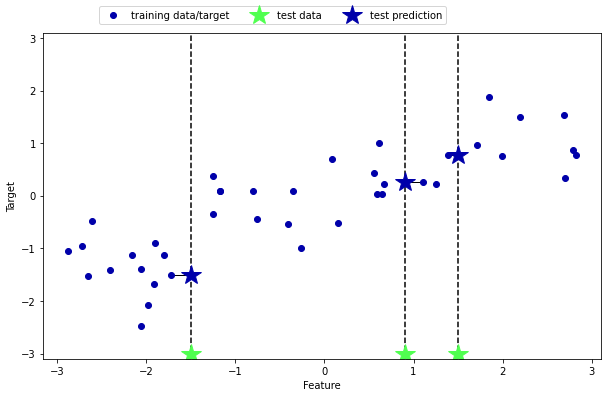

In [59]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

In [60]:
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors=2)
model = KNeighborsRegressor(n_neighbors=2).fit(X, y)
r_sq = model.score(X, y)
print(r_sq)

0.8827758715280114


## Testing Data Set


In [61]:
test['HouseStyle']= test['HouseStyle'].map(stylemapping)
test['ExterQual']= test['ExterQual'].map(qualmapping)
test['ExterCond']= test['ExterCond'].map(qualmapping)
test['BsmtQual']= test['BsmtQual'].map(qualmapping)
test['ExterQual']= test['ExterQual'].map(qualmapping)
test['BsmtCond']= test['BsmtCond'].map(qualmapping)
test['HeatingQC']= test['HeatingQC'].map(qualmapping)
test['KitchenQual']= test['KitchenQual'].map(qualmapping)
test['FireplaceQu']= test['FireplaceQu'].map(qualmapping)
test['GarageQual']= test['GarageQual'].map(qualmapping)
test['GarageCond']= test['GarageCond'].map(qualmapping)
test['PoolQC']= test['PoolQC'].map(qualmapping)
test['MSZoning']= test['MSZoning'].map(zoningmapping)
test['Functional']= test['Functional'].map(functmapping)
test['SaleCondition']= test['SaleCondition'].map(scmapping)

In [62]:
test['ExterQual']= test.ExterQual.astype('int64')
test['ExterCond']= test.ExterCond.astype('int64')
test['BsmtQual']= test.BsmtQual.astype('int64')
test['ExterQual']= test.ExterQual.astype('int64')
test['BsmtCond']= test.BsmtCond.astype('int64')
test['HeatingQC']= test.HeatingQC.astype('int64')
test['KitchenQual']= test.KitchenQual.astype('int64')
test['FireplaceQu']= test.FireplaceQu.astype('int64')
test['GarageQual']= test.GarageQual.astype('int64')
test['GarageCond']= test.GarageCond.astype('int64')
test['PoolQC']= test.PoolQC.astype('int64')
test['MSZoning']= test.MSZoning.astype('int64')
test['Functional']= test.Functional.astype('int64')
test['SaleCondition']= test.SaleCondition.astype('int64')
# test['LotFrontage']= test.LotFrontage.astype('int64')
# test['GarageYrBlt']= test.GarageYrBlt.astype('int64')
# test['MasVnrArea']= test.MasVnrArea.astype('int64')

In [63]:
test['WasRemodeled'] = test["YearRemodAdd"] != test["YearBuilt"]
test['WasRemodeled'] = test.WasRemodeled.astype('int64')

test['AgeatSale']= test["YrSold"] - test["YearBuilt"]

test["TotalSF"] = test["TotalBsmtSF"] + test["1stFlrSF"] + test["2ndFlrSF"]
test["TotalRoom"] = test["BsmtFullBath"] + test["BsmtHalfBath"] + test["FullBath"] + test["HalfBath"] + test["TotRmsAbvGrd"]
test['AvgSpacePerRoom'] = test["TotalSF"] / test["TotalRoom"]

test['HousetoLotProp'] = test["TotalSF"] / test["LotArea"]

test['TotalBackyardAreaUtilized'] = test['WoodDeckSF']+test['OpenPorchSF']+test['EnclosedPorch']+test['3SsnPorch']+test['ScreenPorch']+test['PoolArea']

test['TotalSFwithGarage'] = test['TotalBsmtSF'] + test['1stFlrSF'] + test['2ndFlrSF']+ test['GarageArea']

test['GarageAreaPerVehicle'] = test['GarageArea'] / test['GarageCars']
test = test.fillna(0)

fr= round(test['LotFrontage'] / test['LotArea'],4)
test['FrontageProportiontoArea'] = fr * 100

test['TotalNumBath'] = test['BsmtFullBath'] + test['BsmtHalfBath'] + test['FullBath']+ test['HalfBath']


In [64]:
X= homedata[['OverallQual', 'GrLivArea', 'KitchenQual' ,'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'BsmtQual', 'FullBath', 'TotRmsAbvGrd',  'YearBuilt', 'FireplaceQu', 'YearRemodAdd' , 'GarageYrBlt', 'MasVnrArea' , 'Fireplaces' , 'HeatingQC', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF',  '2ndFlrSF' , 'OpenPorchSF', 'SaleCondition', 'HalfBath', 'GarageQual',  'LotArea', 'GarageCond', 'WasRemodeled' , 'AgeatSale', 'AvgSpacePerRoom' , 'HousetoLotProp', 'TotalBackyardAreaUtilized' , 'TotalSFwithGarage'  , 'GarageAreaPerVehicle', 'FrontageProportiontoArea', 'TotalNumBath', 'TotalSF', 'HouseStyle']]
Z= test[['OverallQual', 'GrLivArea', 'KitchenQual' ,'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'BsmtQual', 'FullBath', 'TotRmsAbvGrd',  'YearBuilt', 'FireplaceQu', 'YearRemodAdd' , 'GarageYrBlt', 'MasVnrArea' , 'Fireplaces' , 'HeatingQC', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF',  '2ndFlrSF' , 'OpenPorchSF', 'SaleCondition', 'HalfBath', 'GarageQual',  'LotArea', 'GarageCond', 'WasRemodeled' , 'AgeatSale', 'AvgSpacePerRoom' , 'HousetoLotProp', 'TotalBackyardAreaUtilized' , 'TotalSFwithGarage'  , 'GarageAreaPerVehicle', 'FrontageProportiontoArea', 'TotalNumBath', 'TotalSF', 'HouseStyle' ]]

y= homedata['SalePrice']


model = KNeighborsRegressor(n_neighbors=2).fit(X, y)
r_sq = model.score(X, y)
print(r_sq)

y_pred = model.predict(X)
y_pred2= pd.DataFrame(y_pred)

print(y_pred2.head())

0.8827758715280114
          0
0  217750.0
1  169250.0
2  219200.0
3  159000.0
4  265000.0


In [65]:
# MAPE for the training data
mape = np.mean(np.abs(homedata['SalePrice'] - y_pred2[0]) / homedata['SalePrice'])
print(mape)

0.09543782772244391


In [66]:
result = pd.read_csv('test_actual_price.csv').set_index('Id')
result = result.sort_values(by='Id')
y = result['SalePrice']
model = KNeighborsRegressor(n_neighbors=2).fit(Z, y)
r_sq = model.score(Z, y)
print(r_sq)

y_pred3 = model.predict(Z)
test['SalePrice'] = y_pred3
y_pred4= pd.DataFrame(test['SalePrice'])
print(y_pred4.head())
print(y.head())

0.9112668615944837
      SalePrice
Id             
1461   109250.0
1462   163500.0
1463   197450.0
1464   192500.0
1465   185750.0
Id
1461    105000
1462    172000
1463    189900
1464    195500
1465    191500
Name: SalePrice, dtype: int64


In [67]:
y.head(15)

Id
1461    105000
1462    172000
1463    189900
1464    195500
1465    191500
1466    175900
1467    185000
1468    180400
1469    171500
1470    126000
1471    184000
1472     96000
1473    105500
1474    149900
1475    120000
Name: SalePrice, dtype: int64

In [68]:

y_pred4.to_csv('y_pred4.csv', header=True)

In [69]:
y_pred4.head()

,SalePrice
Id,
1461,109250.0
1462,163500.0
1463,197450.0
1464,192500.0
1465,185750.0


In [70]:
p = pd.read_csv('y_pred4.csv')
o = pd.read_csv('test_actual_price.csv')
print(p.head())
print(o.head())

     Id  SalePrice
0  1461   109250.0
1  1462   163500.0
2  1463   197450.0
3  1464   192500.0
4  1465   185750.0
     Id  SalePrice
0  1975     615000
1  1664     610000
2  2264     591587
3  2683     584500
4  1678     552000


In [71]:
eva = pd.merge(p, o, on='Id', how='inner', suffixes=['_pred', '_actual'])

In [72]:
eva.head()

,Id,SalePrice_pred,SalePrice_actual
0,1461,109250.0,105000
1,1462,163500.0,172000
2,1463,197450.0,189900
3,1464,192500.0,195500
4,1465,185750.0,191500


In [73]:
mape = np.mean(np.abs(eva['SalePrice_actual'] - eva['SalePrice_pred']) / eva['SalePrice_actual'])
print(mape)

0.10210829460074093


In [74]:
MAPE = round(mape * 100 , 2)

In [75]:
print('The MAPE is' ,MAPE,  '%!') 

The MAPE is 10.21 %!


# Alternative Algorithms

## Linear Regression

In [76]:
X= test[['OverallQual', 'GrLivArea', 'KitchenQual' ,'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'BsmtQual', 'FullBath', 'TotRmsAbvGrd',  'YearBuilt', 'FireplaceQu', 'YearRemodAdd' , 'GarageYrBlt', 'MasVnrArea' , 'Fireplaces' , 'HeatingQC', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF',  '2ndFlrSF' , 'OpenPorchSF', 'SaleCondition', 'HalfBath', 'GarageQual',  'LotArea', 'GarageCond', 'WasRemodeled' , 'AgeatSale', 'AvgSpacePerRoom' , 'HousetoLotProp', 'TotalBackyardAreaUtilized' , 'TotalSFwithGarage'  , 'GarageAreaPerVehicle', 'FrontageProportiontoArea', 'TotalNumBath', 'TotalSF', 'HouseStyle', 'BedroomAbvGr']]


In [77]:
model= LinearRegression().fit(X,y)
r_sq = model.score(X, y)
print(r_sq)

0.8684222960971031


In [78]:
y_pred = model.predict(X)

In [79]:
test['SalePrice'] = y_pred
y_pred2 = pd.DataFrame(test['SalePrice'])
y_pred2.head()

,SalePrice
Id,
1461,125579.022621
1462,169069.379669
1463,178406.660906
1464,198185.190694
1465,198523.752789


In [80]:
y_pred2.to_csv('y_pred2.csv', header=True)

In [81]:
p = pd.read_csv('y_pred2.csv')
o = pd.read_csv('test_actual_price.csv')
print(p.head())
print(o.head())

     Id      SalePrice
0  1461  125579.022621
1  1462  169069.379669
2  1463  178406.660906
3  1464  198185.190694
4  1465  198523.752789
     Id  SalePrice
0  1975     615000
1  1664     610000
2  2264     591587
3  2683     584500
4  1678     552000


In [82]:
eva = pd.merge(p, o, on='Id', how='inner', suffixes=['_pred', '_actual'])
eva.head()

,Id,SalePrice_pred,SalePrice_actual
0,1461,125579.022621,105000
1,1462,169069.379669,172000
2,1463,178406.660906,189900
3,1464,198185.190694,195500
4,1465,198523.752789,191500


In [83]:
mape = np.mean(np.abs(eva['SalePrice_actual'] - eva['SalePrice_pred']) / eva['SalePrice_actual'])
print(mape)

0.11683049741527296


In [84]:
MAPE = round(mape * 100 , 2)
print('The MAPE is' ,MAPE,  '%!') 

The MAPE is 11.68 %!


## Decision Tree Regression

In [85]:
# We set up and ran the Decision Tree model and the results were very high when trying to calculate the MAPE. With some additional
# processing of the data the MAPE was claculating well approve 50% on average. This was with altering the parameters.
# We are not including the code for this one simply due to the unacceptable margin of error we encountered using this model. 
# We believe that the processing of the data that we did 
# to align with the linear regression model may have cause some issue within the data that didn't agree with the 
# Decision tree model. The lowest MAPE we were able to get from the Decision Tree Model was a 51.23%. Other features that may have been causing the high MAPE score are 
# the features we derived were from linear formulating calculations. 
# This is why we chose not to utilize the Decision tree model for this set of data due to the linear issues.

# The Final Model

## Random Forest Regression

In [86]:
from sklearn.ensemble import RandomForestRegressor

In [87]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
rf_model = regressor.fit(X, y)
r_sq = rf_model.score(X, y)
print(r_sq)

0.9790873690591017


In [88]:
y_predrf = rf_model.predict(X)

In [89]:
test['SalePrice'] = y_predrf
y_pred5= pd.DataFrame(test['SalePrice'])
print(y_pred5.head())
print(y.head())

      SalePrice
Id             
1461   116100.0
1462   164800.0
1463   192520.0
1464   198550.0
1465   190350.0
Id
1461    105000
1462    172000
1463    189900
1464    195500
1465    191500
Name: SalePrice, dtype: int64


In [90]:
y_pred5.to_csv('y_pred5.csv', header=True)

In [91]:
p = pd.read_csv('y_pred5.csv')
o = pd.read_csv('test_actual_price.csv')
print(p.head())
print(o.head())

     Id  SalePrice
0  1461   116100.0
1  1462   164800.0
2  1463   192520.0
3  1464   198550.0
4  1465   190350.0
     Id  SalePrice
0  1975     615000
1  1664     610000
2  2264     591587
3  2683     584500
4  1678     552000


In [92]:
eva = pd.merge(p, o, on='Id', how='inner', suffixes=['_pred', '_actual'])
eva.head()

,Id,SalePrice_pred,SalePrice_actual
0,1461,116100.0,105000
1,1462,164800.0,172000
2,1463,192520.0,189900
3,1464,198550.0,195500
4,1465,190350.0,191500


In [93]:
mape = np.mean(np.abs(eva['SalePrice_actual'] - eva['SalePrice_pred']) / eva['SalePrice_actual'])
print(mape)

0.04558147252187972


In [94]:
MAPE = round(mape * 100 , 2)
print('The MAPE is' ,MAPE,  '%!') 

The MAPE is 4.56 %!
